# Rugby Data Experiment

In [1]:
# To make markdown from this file
# jupyter nbconvert --to markdown RugbyExperiment.ipynb --output README.md

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True

pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
rugby = pd.read_csv("RugbyData.csv")
rugby.head(5)

,Team1,Score1,Score2,Team2,Year
0,Scotland,27,22,Ireland,2017
1,England,19,16,France,2017
2,Italy,7,33,Wales,2017
3,Italy,10,63,Ireland,2017
4,Wales,16,21,England,2017


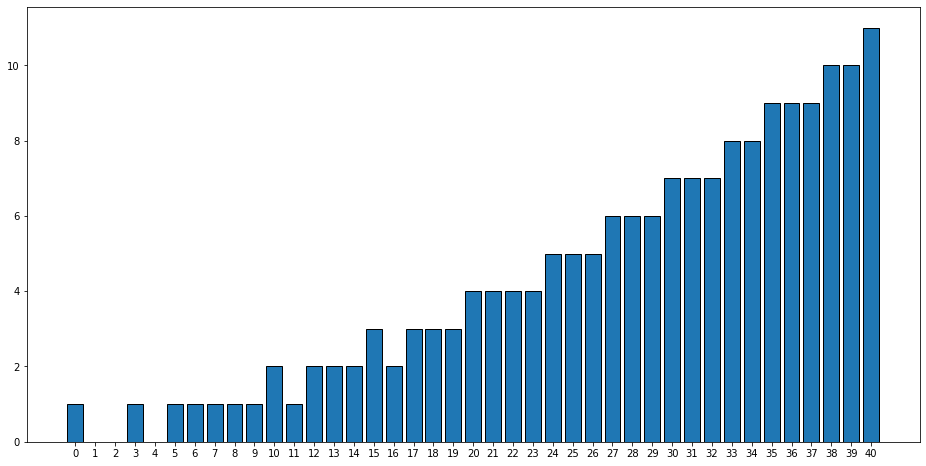

In [4]:
# Number of ways to reach score n.
n = 40

# table[i] will store count of solutions for value i.
table = [0 for i in range(n+1)]

# Base case (If given value is 0)
table[0] = 1

# One by one consider given 3 moves and update the 
# table[] values after the index greater than or equal 
# to the value of the picked move.
for i in range(3, n+1):
    table[i] += table[i-3]
for i in range(5, n+1):
    table[i] += table[i-5]
for i in range(7, n+1):
    table[i] += table[i-7]


d={i:x for i,x in enumerate(table)}
score_possibilities = plt.figure(figsize=(16,8))
plt.bar(range(len(d)), list(d.values()), align='center')
plt.xticks(range(len(d)), list(d.keys()))
plt.show()

## All_Scores is a series made by appending Score1 and Score2 columns

In [5]:
All_Scores = rugby['Score1'].append(rugby['Score2'])

## Countplot for scores

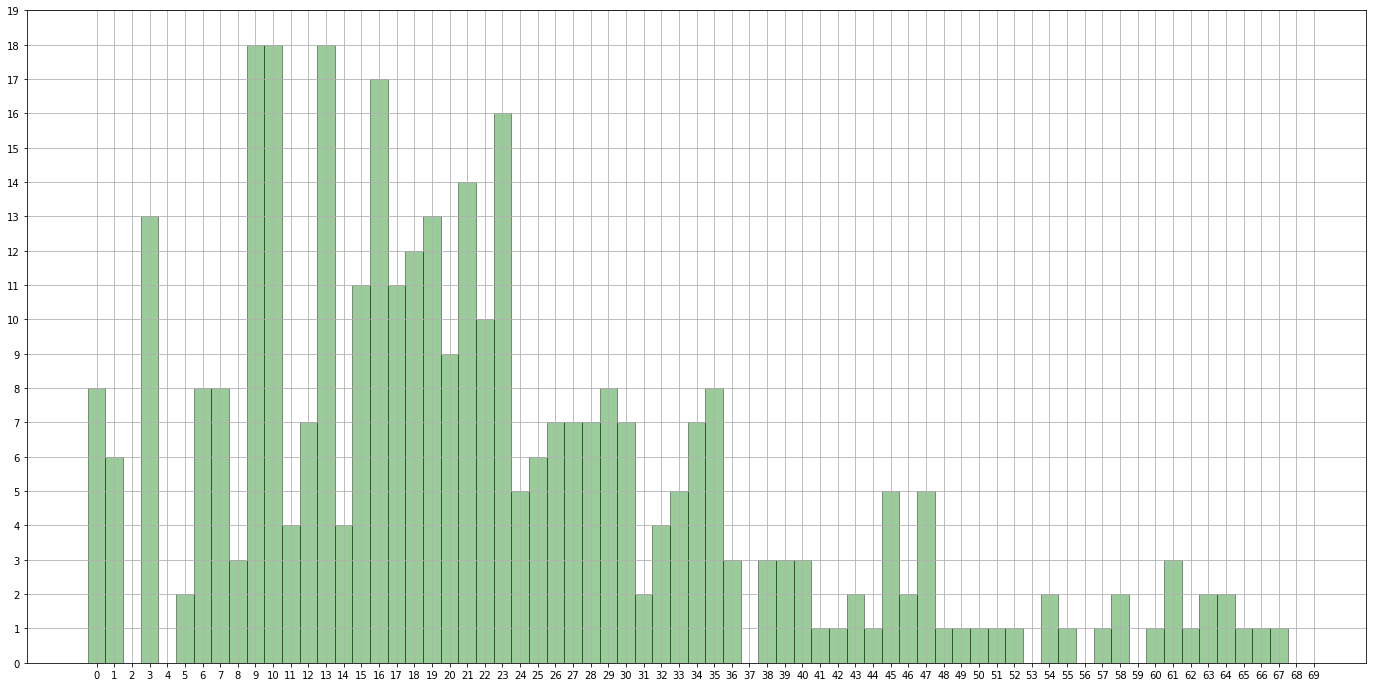

In [6]:
score_data_countplot = plt.figure(figsize=(24,12))
ax = sns.distplot(All_Scores, bins=np.arange(70)-0.5, kde=False, color = 'g')
ax.set(xticks=range(0,70))
ax.set(yticks=range(0,20))
ax.grid()

In [7]:
most_freq = All_Scores.value_counts()
for score, count in most_freq.head(10).iteritems():
    print("{} has occurred {} times".format(score, count))

9 has occurred 18 times
10 has occurred 18 times
13 has occurred 18 times
16 has occurred 17 times
23 has occurred 16 times
21 has occurred 14 times
19 has occurred 13 times
3 has occurred 13 times
18 has occurred 12 times
15 has occurred 11 times


#### Common scores seen in the ranges 9-10, 12-13, 15-23, 26-30

## Team Specifics

## Function to return match history of 2 teams

In [8]:
def match_history(country1, country2):
    games1 = rugby[(rugby['Team1']==country1) & (rugby['Team2']==country2)]
    games2 = rugby[(rugby['Team2']==country1) & (rugby['Team1']==country2)]
    c = games2.columns
    games2[[c[0], c[3]]] = games2[[c[3], c[0]]]
    games2[[c[1], c[2]]] = games2[[c[2], c[1]]]
    games = games1.append(games2)
    games.sort_index(inplace=True)
    return games

In [13]:
mh = match_history("Wales", "England")
mh

,Team1,Score1,Score2,Team2,Year
4,Wales,16,21,England,2017
25,Wales,21,25,England,2016
30,Wales,16,21,England,2015
56,Wales,18,29,England,2014
73,Wales,30,3,England,2013
82,Wales,19,12,England,2012
93,Wales,28,25,England,2015


In [10]:
print("Mean scores are {} {}".format(mh['Score1'].mean(), mh['Score2'].mean()))

Mean scores are 21.142857142857142 19.428571428571427


#### Here we will create a regression plot of the scores from a pair of teams' match history

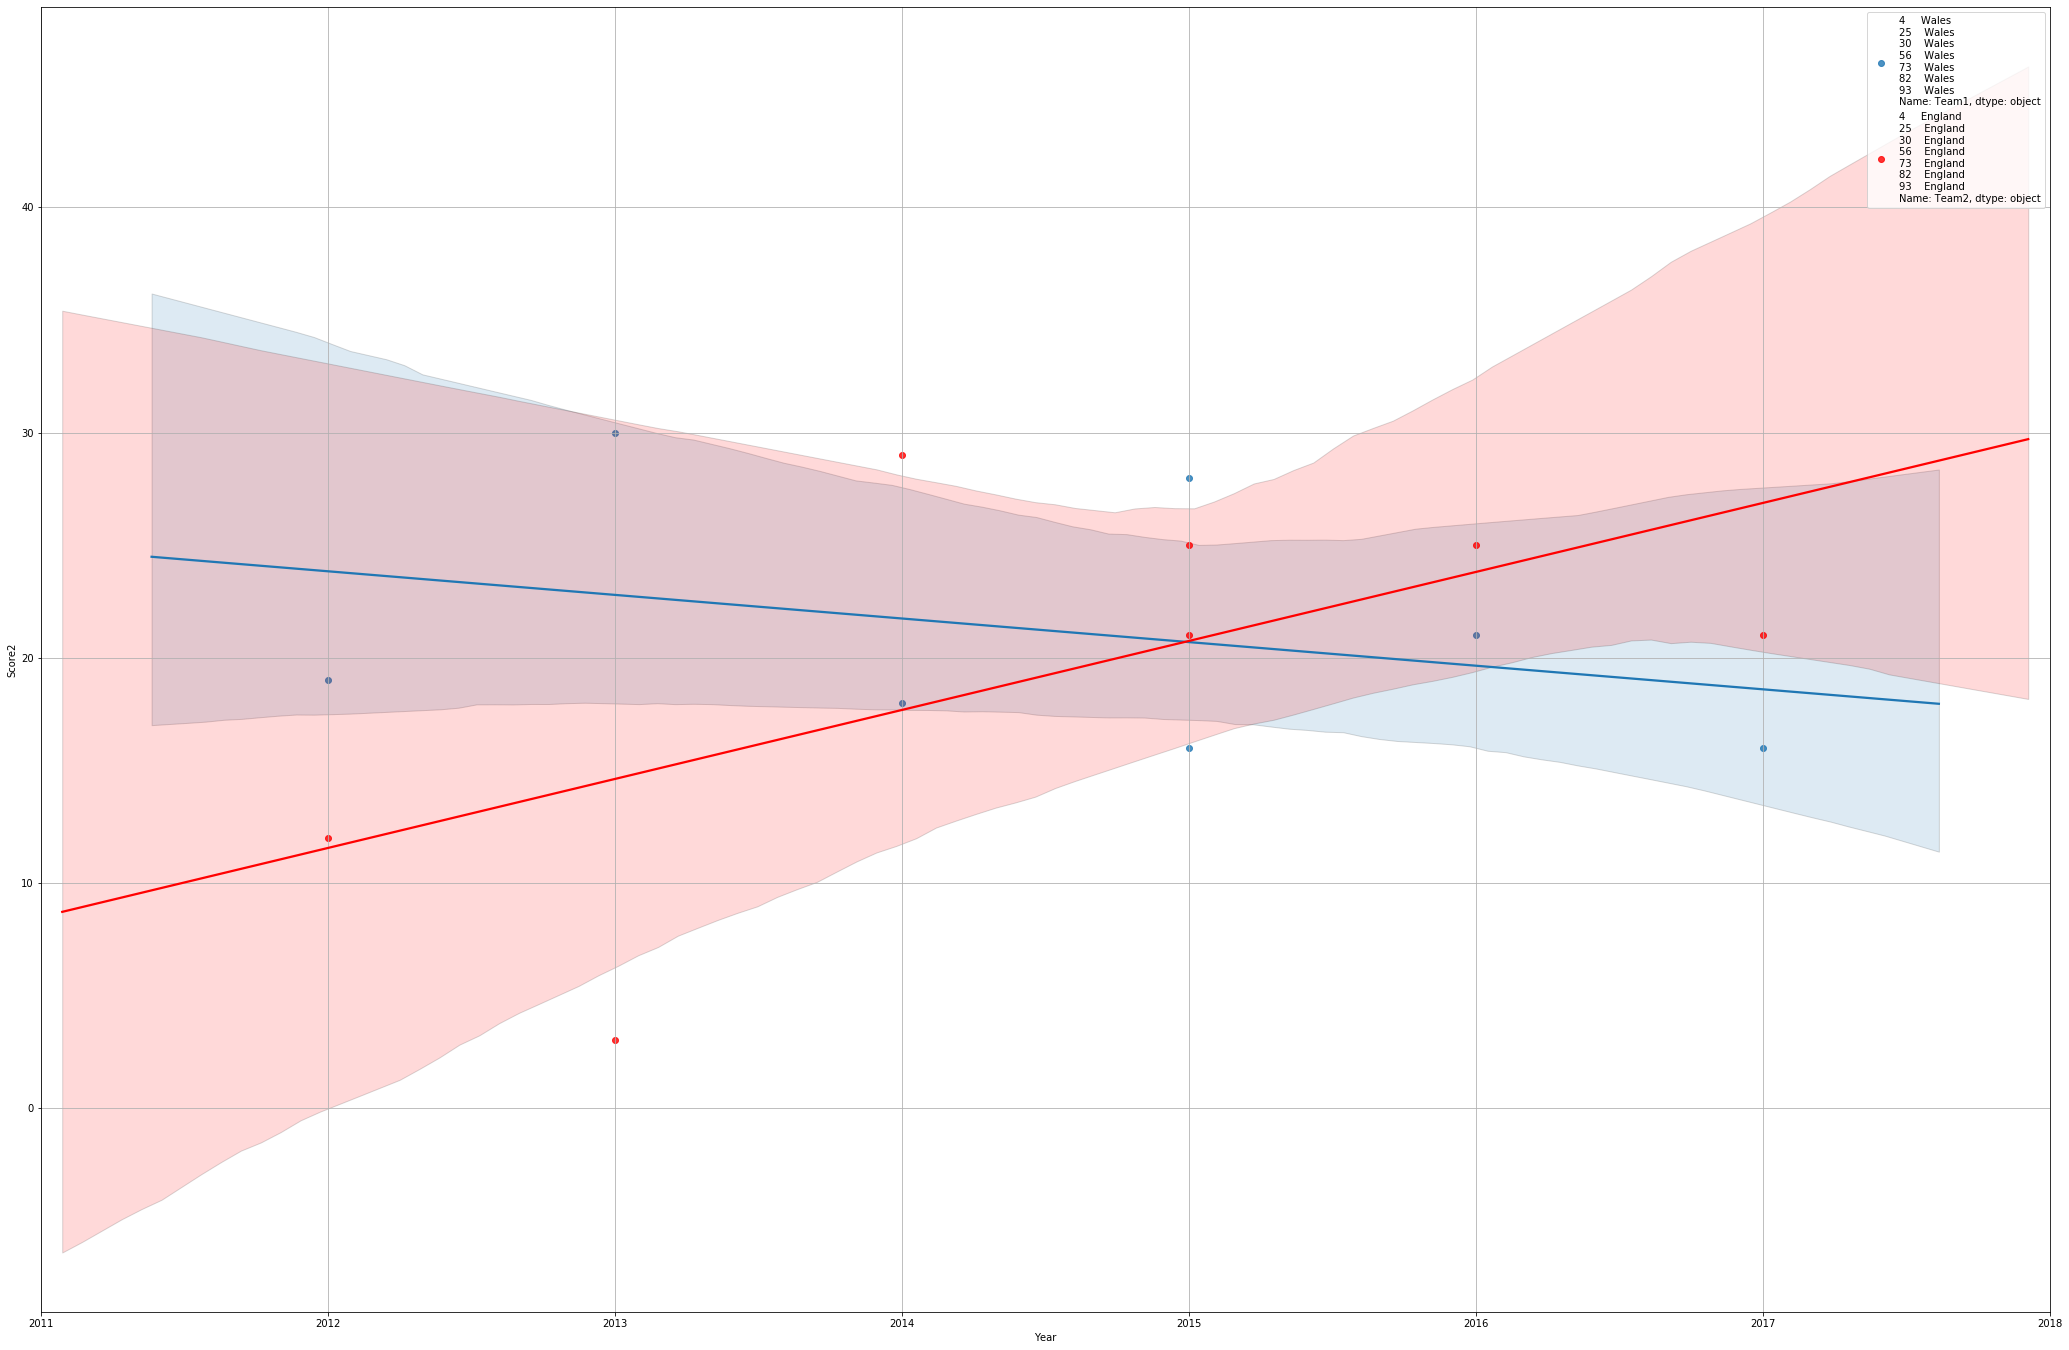

In [11]:
fig, ax = plt.subplots(figsize=(36,24))
p = sns.regplot(x='Year', y='Score1', data=mh, ax=ax, label=mh['Team1'])
p2 = sns.regplot(x='Year', y='Score2', data=mh, ax=ax, label=mh['Team2'], color='r')
plt.xlim(2011, 2018)
ax.grid()
ax.legend(loc="best")